#  <center>AirBnB Data Analysis for Austin Texas<center>
### <center>by Patrick Bloomingdale<center>

**For this project I will be using the CRoss-Industry Standard Process for Data Mining (CRISP-DM) to analyze AirBnB dataset for Austin Texas.**<br>

**What is CRISP-DM?** <br>
CRISP-DM is described in the six steps below:
1. Business Understanding <br>
Focuses on understanding the project objectives and requirements from a business perspective, and then using this perspective to come up with data mining problem definitions and a preliminary plan.

2. Data Understanding <br>
Begins the initial data collection and activities to understand the data, identify any data quality problems, discover first data insights, and/or to find interesting subsets to form hypotheses for hidden information.

3. Data Preparation <br>
This step covers the activities to create the final dataset from the initial raw data.

4. Modeling <br>
Modeling techniques are selected and applied.  Data preperation may be needed under this step when it is discovered that additional information is needed. 

5. Evaluation <br>
This step assesses the degree to which the model meets the business objectives and seeks to determine if there is some business reason why this model is deficient, and assesses other data mining results generated. 

6. Deployment <br>
This step takes the evaluation results and determines a strategy for deployment. If a general procedure has been identified to create the relevant model(s), this procedure is documented here for later deployment.   

In [1]:
#Import Libraries used for data analysis
import pandas as pd
import numpy as np
from collections import defaultdict

#Import date/time Libraries
import calendar
import datetime

#Import Libraries used for visualization
import seaborn as sns
import matplotlib.pyplot as plt 
#make sure plots render within the notebook
%matplotlib inline 
from matplotlib import pyplot

#Used to build predictive model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
import seaborn as sns
'''
Below is a list of packages not in use for this analysis, 
but like to keep them handy for future projects

from datetime import datetime
import matplotlib.dates as mdates
import calendar
import csv
from scipy.ndimage.filters import gaussian_filter1d
import scipy.stats as stats
from collections import Counter 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from mpl_toolkits.basemap import Basemap
'''

'\nBelow is a list of packages not in use for this analysis, \nbut like to keep them handy for future projects\n\nfrom datetime import datetime\nimport matplotlib.dates as mdates\nimport calendar\nimport csv\nfrom scipy.ndimage.filters import gaussian_filter1d\nimport scipy.stats as stats\nfrom collections import Counter \nfrom mpl_toolkits.mplot3d import Axes3D\nfrom matplotlib.collections import PolyCollection\nfrom mpl_toolkits.basemap import Basemap\n'

In [2]:
#Set the column and row limits to see everything
pd.set_option('display.max_columns',100)
pd.set_option('display.width',1000)
pd.set_option("display.max_rows",100)

## 1. Business Understaning
1. Monthly average price/night for a city?
2. Average price on weekdays (Monday through Friday)?
3. Monthly Occupancy Ration for each city?
4. Average price per night by neighborhood?
5. Occupancy ration by neighborhood?
6. 1 Year Rebooking Rate by Trip Length

## 2. Data Understanding

In [3]:
#Load CSV files for Austin Texas
df_atx_listing = pd.read_csv('listings_austin.csv.gz', compression='gzip', error_bad_lines=False)
df_atx_calendar = pd.read_csv('reviews_austin.csv.gz', compression='gzip', error_bad_lines=False)
df_atx_reviews = pd.read_csv('calendar_austin.csv.gz', compression='gzip', error_bad_lines=False)

In [4]:
#Get the number or rows and columns for each dataset
atx_listing = df_atx_listing.shape
atx_calendar = df_atx_calendar.shape
atx_reviews = df_atx_reviews.shape
print("                  Rows,  Columns")
print(" Austin listing:  {}".format(atx_listing)) 
print("--------------------------------")
print(" Austin calendar: {}".format(atx_calendar)) 
print("--------------------------------")
print(" Austin reviews:  {}".format(atx_reviews)) 

                  Rows,  Columns
 Austin listing:  (10305, 74)
--------------------------------
 Austin calendar: (317818, 6)
--------------------------------
 Austin reviews:  (3761760, 7)


In [5]:
#datatypes of columns and missing values
print("Austin Listing---------------------------------------------------")
print(df_atx_listing.info())
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print("Austin Calendar--------------------------------------------------")
print(df_atx_calendar.info())
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print("Austin Reviews---------------------------------------------------")
print(df_atx_reviews.info())

Austin Listing---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10305 entries, 0 to 10304
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10305 non-null  int64  
 1   listing_url                                   10305 non-null  object 
 2   scrape_id                                     10305 non-null  int64  
 3   last_scraped                                  10305 non-null  object 
 4   name                                          10305 non-null  object 
 5   description                                   10116 non-null  object 
 6   neighborhood_overview                         6631 non-null   object 
 7   picture_url                                   10304 non-null  object 
 8   host_id                                       10305 non-null  int64  


In [6]:
#look at columns and first 5 rows
print("Austin Listing---------------------------------------------------")
df_atx_listing.head()

Austin Listing---------------------------------------------------


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2265,https://www.airbnb.com/rooms/2265,20201019155524,2020-10-20,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,NaN,https://a0.muscache.com/pictures/4740524/63f82...,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a day,100%,100%,f,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,NaN,78702,NaN,30.27750,-97.71398,Entire house,Entire home/apt,4,NaN,2 baths,2.0,2.0,"[""Free street parking"", ""Washer"", ""Heating"", ""...",$179.00,7,180,7,7,180,180,7.0,180.0,NaN,t,0,9,39,129,2020-10-20,24,0,0,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,NaN,f,3,2,1,0,0.17
1,5245,https://www.airbnb.com/rooms/5245,20201019155524,2020-10-20,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,NaN,https://a0.muscache.com/pictures/5167505/b33b5...,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a day,100%,100%,f,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,NaN,78702,NaN,30.27577,-97.71379,Private room in house,Private room,2,NaN,1 private bath,1.0,2.0,"[""Free street parking"", ""Washer"", ""Heating"", ""...",$114.00,30,60,30,30,60,60,30.0,60.0,NaN,t,0,0,0,0,2020-10-20,9,0,0,2009-03-19,2018-03-14,91.0,10.0,8.0,10.0,9.0,10.0,9.0,NaN,f,3,2,1,0,0.06
2,5456,https://www.airbnb.com/rooms/5456,20201019155524,2020-10-20,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,Sylvia,2009-02-16,"Austin, Texas, United States",I am a licensed Real Estate Broker and owner o...,within an hour,100%,92%,t,https://a0.muscache.com/im/users/8028/profile_...,https://a0.muscache.com/im/users/8028/profile_...,East Downtown,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Austin, Texas, United States",78702,NaN,30.26112,-97.73448,Entire guesthouse,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""Free street parking"", ""Heating"", ""Long term ...",$95.00,2,90,2,2,90,90,2.0,90.0,NaN,t,29,55,85,360,2020-10-20,536,30,1,2009-03-08,2020-10-11,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,3.79
3,5636,https://www.airbnb.com/rooms/5636,20201019155524,

In [7]:
#look at the data types
df_atx_listing.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               

**Will need to convert the following data types before I can begin my analysis:**

| DataFrame       | Column           | Current Datatype   | Converted Datatype |
| :-------------- | :--------------- | -----------------: |-------------------:|
| df_atx_listing  | last_scraped     | object             | date               |
| df_atx_listing  | bedrooms         | float64            | int64              |
| df_atx_listing  | price            | object             | float64            |
| df_atx_listing  | host_since       | object             | float64            |
| df_atx_reviews  | price            | object             | float64            |
| df_atx_reviews  | adjusted_price   | object             | float64            |
| df_atx_reviews  | date             | object             | date               |
| df_atx_calendar | date             | object             | date               |

In [8]:
#look at columns and first 5 rows
print("Austin Calendar--------------------------------------------------")
df_atx_calendar.head()

Austin Calendar--------------------------------------------------


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2265,963,2009-03-17,7538,Niall,I stayed here during SXSW and had a really ple...
1,2265,1057,2009-03-22,10029,Michael,"Great place, close enough to everything downto..."
2,2265,200418,2011-03-16,61677,Gustaf,We had a great time in Austin staying at Paddy...
3,2265,1001630,2012-03-15,1523753,Noah,We had a great stay at Zen East for South By S...
4,2265,1016390,2012-03-19,1547660,Melissa,I arrived late in the evening so did not meet ...


In [9]:
#look at the data types
df_atx_calendar.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [10]:
#look at columns and first 5 rows
print("Austin Reviews---------------------------------------------------")
df_atx_reviews.head()

Austin Reviews---------------------------------------------------


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2482916,2020-10-21,f,$500.00,$500.00,1.0,1125.0
1,2482916,2020-10-22,f,$625.00,$625.00,1.0,1125.0
2,2482916,2020-10-23,f,$625.00,$625.00,2.0,1125.0
3,2482916,2020-10-24,f,$625.00,$625.00,2.0,1125.0
4,2482916,2020-10-25,f,$625.00,$625.00,1.0,1125.0


In [11]:
#look at the data types
df_atx_reviews.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

## 3. Data Prepration

**Look at the different cities (Neighbourhood's) in the Austin and surrounding area**

In [12]:
#Look at the different cities listed in df_atx_listing
nbrhood_vals = df_atx_listing.neighbourhood.value_counts()
nbrhood_vals

Austin, Texas, United States                    6544
Lakeway, Texas, United States                     33
West Lake Hills, Texas, United States             16
Sunset Valley, Texas, United States                7
Pflugerville, Texas, United States                 3
Bee Cave, Texas, United States                     3
Rollingwood, Texas, United States                  2
The Hills, Texas, United States                    2
Lago Vista, Texas, United States                   2
Lake Travis, Texas, United States                  2
Del Valle, Texas, United States                    2
Dripping Springs, Texas, United States             2
Austin , Texas, United States                      2
Austin, Tx, United States                          2
United States                                      2
Westlake Hills, Austin, Texas, United States       1
Clarksville, Texas, United States                  1
austin, Texas, United States                       1
Round Rock, Texas, United States              

In [13]:
#fix the data in the neighbourhood column
df_atx_listing['neighbourhood'] = df_atx_listing['neighbourhood'].str.replace('Austin, Tx, United States', 'Austin, Texas, United States')
df_atx_listing['neighbourhood'] = df_atx_listing['neighbourhood'].str.replace('Austin , Texas, United States', 'Austin, Texas, United States')
df_atx_listing['neighbourhood'] = df_atx_listing['neighbourhood'].str.replace('austin, Texas, United States', 'Austin, Texas, United States')
df_atx_listing['neighbourhood'] = df_atx_listing['neighbourhood'].str.replace('Downtown Austin, Texas, United States', 'Austin, Texas, United States')

In [14]:
#Check to make sure all cities with Austin were combined into one
df_atx_listing.neighbourhood.value_counts()

Austin, Texas, United States                    6550
Lakeway, Texas, United States                     33
West Lake Hills, Texas, United States             16
Sunset Valley, Texas, United States                7
Bee Cave, Texas, United States                     3
Pflugerville, Texas, United States                 3
United States                                      2
Dripping Springs, Texas, United States             2
Rollingwood, Texas, United States                  2
The Hills, Texas, United States                    2
Lago Vista, Texas, United States                   2
Lake Travis, Texas, United States                  2
Del Valle, Texas, United States                    2
Clarksville, Texas, United States                  1
Westlake Hills, Austin, Texas, United States       1
Round Rock, Texas, United States                   1
Cypress Creek Arm, Texas, United States            1
Manchaca, Texas, United States                     1
Name: neighbourhood, dtype: int64

In [15]:
#Create dataframe with Non-Austin Cities and remove United States
df_non_atx = df_atx_listing

#Drop Austin from neighbourhood
df_non_atx = df_non_atx[df_non_atx.neighbourhood != 'Austin, Texas, United States']
df_non_atx = df_non_atx[df_non_atx.neighbourhood != 'United States']

#Remove United States from neighbourhood
df_non_atx['neighbourhood'] = df_non_atx['neighbourhood'].str.replace(', Texas, United States','')

df_non_atx_vals = df_non_atx.neighbourhood.value_counts()

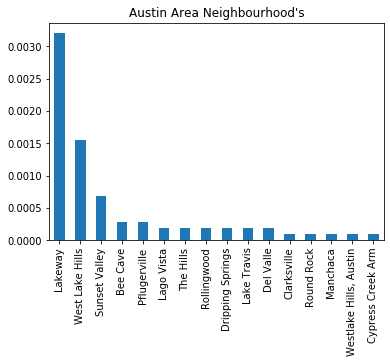

In [16]:
#bar chart of Austin Area with Austin Texas removed
(df_non_atx_vals/df_atx_listing.shape[0]).plot(kind="bar");
plt.title("Austin Area Neighbourhood's");

**Look at the different property types in the Austin and surrounding area**

In [17]:
#What are the different property types?
property_type_vals = df_atx_listing.property_type.value_counts()
#Top 20 Property Values
property_type_vals = property_type_vals.head(20)
property_type_vals

Entire house                   3049
Entire apartment               1867
Private room in house          1330
Entire condominium              836
Entire serviced apartment       601
Entire guesthouse               470
Private room in apartment       407
Entire townhouse                259
Entire bungalow                 225
Entire guest suite              208
Private room in townhouse       129
Entire loft                     125
Private room in condominium      99
Camper/RV                        78
Shared room in apartment         73
Entire cottage                   62
Tiny house                       48
Entire villa                     44
Shared room in house             41
Private room in guest suite      38
Name: property_type, dtype: int64

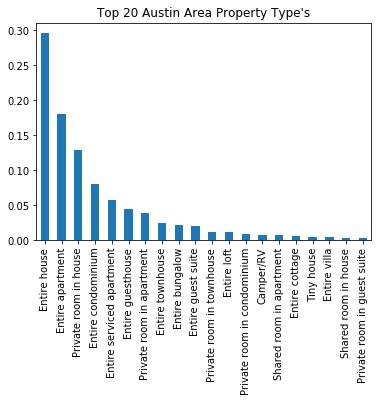

In [18]:
#bar chart of the proportion of the top 20 property types
(property_type_vals/df_atx_listing.shape[0]).plot(kind="bar");
plt.title("Top 20 Austin Area Property Type's");

**Create new columns and convert data types**

In [19]:
#convert bedrooms, accomodates  to int
df_atx_listing.bedrooms = df_atx_listing.bedrooms.fillna(0).astype(int)

In [20]:
#neighbourhood_cleansed should be zipcode
df_atx_listing['zipcode'] = df_atx_listing.neighbourhood_cleansed

In [21]:
#Convert objects to floats
df_atx_listing['price_new'] = df_atx_listing['price']
df_atx_reviews['price_new'] = df_atx_reviews['price']
df_atx_reviews['adjusted_price_new'] = df_atx_reviews['adjusted_price']

df_atx_listing['price_new'] = df_atx_listing['price_new'].map(lambda price: float(price[1:].replace(',','')), na_action = 'ignore')
df_atx_reviews['price_new'] = df_atx_reviews['price_new'].map(lambda price: float(price[1:].replace(',','')), na_action = 'ignore')
df_atx_reviews['adjusted_price_new'] = df_atx_reviews['adjusted_price_new'].map(lambda price: float(price[1:].replace(',','')), na_action = 'ignore')

In [22]:
#Convert Dates
df_atx_listing.host_since = pd.to_datetime(df_atx_listing.host_since)
df_atx_listing.last_scraped = pd.to_datetime(df_atx_listing.last_scraped)
df_atx_listing.calendar_last_scraped = pd.to_datetime(df_atx_listing.calendar_last_scraped)

df_atx_calendar.date = pd.to_datetime(df_atx_calendar.date)
df_atx_reviews.date = pd.to_datetime(df_atx_reviews.date)

In [23]:
#create month day year from calendar
df_atx_calendar['year'] = df_atx_calendar['date'].dt.year 
df_atx_calendar['month'] = df_atx_calendar.date.dt.strftime("%b")
df_atx_calendar['day'] = df_atx_calendar['date'].dt.day
df_atx_calendar['weekday'] = df_atx_calendar['date'].dt.weekday
df_atx_calendar['weekday_number'] = df_atx_calendar['date'].dt.weekday

df_atx_reviews['year'] = df_atx_reviews['date'].dt.year 
df_atx_reviews['month'] = df_atx_calendar.date.dt.strftime("%b")
df_atx_reviews['day'] = df_atx_reviews['date'].dt.day
df_atx_reviews['weekday'] = df_atx_reviews['date'].dt.weekday
df_atx_reviews['weekday_number'] = df_atx_reviews['date'].dt.weekday

In [24]:
#Create weekend column (Friday and Saturday)
weekend = [4,5]
df_atx_calendar['weekend'] = df_atx_calendar.weekday.isin(weekend)
df_atx_reviews['weekend'] = df_atx_reviews.weekday.isin(weekend)

In [25]:
#Convert weekday from number to day of the week
df_atx_calendar['weekday'] = df_atx_calendar['weekday'].replace({0:'Monday', 1:'Tuesday', 2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
df_atx_reviews['weekday'] = df_atx_reviews['weekday'].replace({0:'Monday', 1:'Tuesday', 2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

In [26]:
df_atx_calendar.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month,day,weekday,weekday_number,weekend
0,2265,963,2009-03-17,7538,Niall,I stayed here during SXSW and had a really ple...,2009,Mar,17,Tuesday,1,False
1,2265,1057,2009-03-22,10029,Michael,"Great place, close enough to everything downto...",2009,Mar,22,Sunday,6,False
2,2265,200418,2011-03-16,61677,Gustaf,We had a great time in Austin staying at Paddy...,2011,Mar,16,Wednesday,2,False
3,2265,1001630,2012-03-15,1523753,Noah,We had a great stay at Zen East for South By S...,2012,Mar,15,Thursday,3,False
4,2265,1016390,2012-03-19,1547660,Melissa,I arrived late in the evening so did not meet ...,2012,Mar,19,Monday,0,False


In [27]:
#Check to make sure dates were converted
print('---------------LISTING---------------------------')
print(df_atx_listing.dtypes)
print('---------------CALENDAR---------------------------')
print(df_atx_calendar.dtypes)
print('----------------REVIEWS--------------------------')
print(df_atx_reviews.dtypes)

---------------LISTING---------------------------
id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[ns]
name                                                    object
description                                             object
neighborhood_overview                                   object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[ns]
host_location                                           object
host_about                                              object
host_response_time                                      object
host_

In [28]:
#create a new column for available that is binary
df_atx_reviews['available_binary'] = df_atx_reviews['available'].map(lambda available: 1 if available == 't' else 0)
df_atx_reviews['available_binary'].value_counts()

0    2370527
1    1391233
Name: available_binary, dtype: int64

In [29]:
#Find Values with null values
df_atx_listing.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                                0
description                                       189
neighborhood_overview                            3674
picture_url                                         1
host_id                                             0
host_url                                            0
host_name                                           3
host_since                                          3
host_location                                      23
host_about                                       3962
host_response_time                               4134
host_response_rate                               4134
host_acceptance_rate                             3129
host_is_superhost                                   3
host_thumbnail_url          

In [30]:
df_atx_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10305 entries, 0 to 10304
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            10305 non-null  int64         
 1   listing_url                                   10305 non-null  object        
 2   scrape_id                                     10305 non-null  int64         
 3   last_scraped                                  10305 non-null  datetime64[ns]
 4   name                                          10305 non-null  object        
 5   description                                   10116 non-null  object        
 6   neighborhood_overview                         6631 non-null   object        
 7   picture_url                                   10304 non-null  object        
 8   host_id                                       10305 non-null  int6

**Drop columns not going to use**

In [31]:
#Drop columns not going to use
df_atx_listing = df_atx_listing.drop(['neighborhood_overview',
                     'picture_url',
                     'host_url',
                     'host_about',
                     'last_scraped',
                     'host_name', 
                     'description',
                     'host_response_time',                 
                     'listing_url', 
                     'host_thumbnail_url',
                     'host_picture_url',
                     'host_verifications',
                     'amenities',
                     'number_of_reviews_ltm',
                     'number_of_reviews_l30d',
                     'calendar_last_scraped',                 
                     'calculated_host_listings_count',
                     'calculated_host_listings_count_entire_homes',
                     'calculated_host_listings_count_private_rooms',
                     'host_response_rate',
                     'host_acceptance_rate',
                     'availability_30',
                     'availability_60', 
                     'availability_90',
                     'availability_365'],
                    axis = 1)

In [32]:
df_atx_listing.head()

,id,scrape_id,name,host_id,host_since,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count_shared_rooms,reviews_per_month,zipcode,price_new
0,2265,20201019155524,Zen-East in the Heart of Austin (monthly rental),2466,2008-08-23,"Austin, Texas, United States",f,East Downtown,3.0,3.0,t,t,NaN,78702,NaN,30.27750,-97.71398,Entire house,Entire home/apt,4,NaN,2 baths,2,2.0,$179.00,7,180,7,7,180,180,7.0,180.0,NaN,t,24,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,NaN,f,0,0.17,78702,179.0
1,5245,20201019155524,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,2008-08-23,"Austin, Texas, United States",f,East Downtown,3.0,3.0,t,t,NaN,78702,NaN,30.27577,-97.71379,Private room in house,Private room,2,NaN,1 private bath,1,2.0,$114.00,30,60,30,30,60,60,30.0,60.0,NaN,t,9,2009-03-19,2018-03-14,91.0,10.0,8.0,10.0,9.0,10.0,9.0,NaN,f,0,0.06,78702,114.0
2,5456,20201019155524,"Walk to 6th, Rainey St and Convention Ctr",8028,2009-02-16,"Austin, Texas, United States",t,East Downtown,1.0,1.0,t,t,"Austin, Texas, United States",78702,NaN,30.26112,-97.73448,Entire guesthouse,Entire home/apt,3,NaN,1 bath,1,2.0,$95.00,2,90,2,2,90,90,2.0,90.0,NaN,t,536,2009-03-08,2020-10-11,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,0,3.79,78702,95.0
3,5636,20201019155524,"Soco, Barton Springs Private Guest Cottage",7148,2009-01-27,"Austin, Texas, United States",f,Bouldin Creek,1.0,1.0,t,f,"Austin, Texas, United States",78704,NaN,30.24630,-97.76361,Entire apartment,Entire home/apt,2,NaN,1 bath,1,1.0,$46.00,30,90,30,30,90,90,30.0,90.0,NaN,t,20,2009-04-20,2012-05-24,95.0,9.0,10.0,10.0,10.0,10.0,9.0,NaN,t,0,0.14,78704,46.0
4,5769,20201019155524,NW Austin Room,8186,2009-02-19,"Austin, Texas, United States",t,SW Williamson Co.,1.0,1.0,t,t,"Austin, Texas, United States",78729,NaN,30.45697,-97.78422,Private room in house,Private room,2,NaN,1 shared bath,1,1.0,$39.00,1,14,1,1,14,14,1.0,14.0,NaN,t,257,2010-04-10,2019-11-03,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,0,2.00,78729,39.0


In [33]:
df_atx_reviews.dtypes

listing_id                     int64
date                  datetime64[ns]
available                     object
price                         object
adjusted_price                object
minimum_nights               float64
maximum_nights               float64
price_new                    float64
adjusted_price_new           float64
year                           int64
month                         object
day                            int64
weekday                       object
weekday_number                 int64
weekend                         bool
available_binary               int64
dtype: object

### Question 1: What is the average price per month and day of the week?

<Figure size 864x360 with 0 Axes>

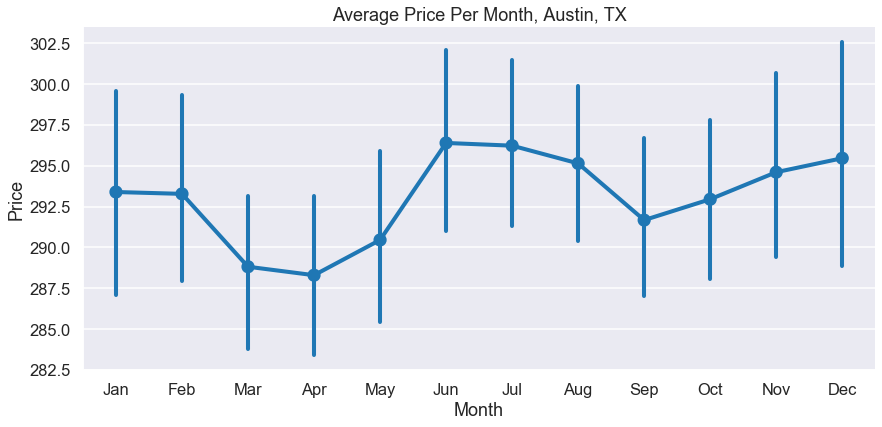

In [34]:
#AVG Price Per Month Chart
df_copy = df_atx_reviews.copy()

month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize = (12,5))
sns.set_style("darkgrid")
sns.set_context("talk")
                           
plot_avg_price_mo = sns.catplot(x = 'month', 
                                y = 'price_new',
                                data = df_copy,
                                kind = "point",
                                truncate=False,                                                         
                                height = 6,
                                aspect = 2.1,                                
                                order=month)

plot_avg_price_mo = plot_avg_price_mo.set_axis_labels("Month", "Price")
plot_avg_price_mo.ax.set_title("Average Price Per Month, Austin, TX")
plot_avg_price_mo.savefig("avg_mo_price.png")

<Figure size 864x360 with 0 Axes>

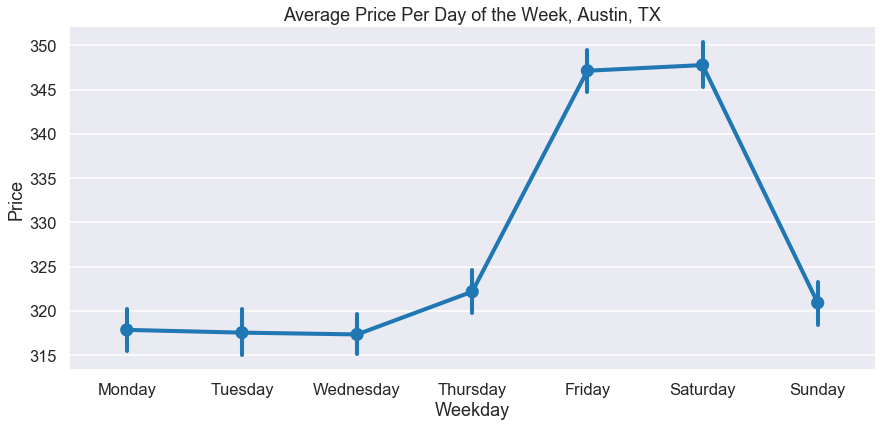

In [35]:
#AVG Price Per Weekday Chart
df_copy = df_atx_reviews.copy()

weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize = (12,5))
sns.set_style("darkgrid")
sns.set_context("talk")
                           
plot_avg_price_week = sns.catplot(x = 'weekday', 
                                y = 'price_new',
                                data = df_copy,
                                kind = "point",
                                truncate=False,                                                         
                                height = 6,
                                aspect = 2.1,                                
                                order=weekday)

plot_avg_price_week = plot_avg_price_week.set_axis_labels("Weekday", "Price")
plot_avg_price_week.ax.set_title("Average Price Per Day of the Week, Austin, TX")
plot_avg_price_mo.savefig("avg_mo_price.png")

### Question 1: Answer
- The average price per month is highest in September and lowest in December
- The average price per day is the highest on Friday and Saturday, and 
- The lowest towards the beginning of the week (Monday, Tuesday, Wednesday).

### Question 2: What are the top five propertie types by ratings and number of reviews?

In [36]:
#Use groupby to find the number of reviews by property type
property_reviews_sort = df_atx_listing.groupby('property_type')['number_of_reviews'].apply(lambda x: x.count())
property_reviews_sort.sort_values(ascending = False)

property_type
Entire house                          3049
Entire apartment                      1867
Private room in house                 1330
Entire condominium                     836
Entire serviced apartment              601
Entire guesthouse                      470
Private room in apartment              407
Entire townhouse                       259
Entire bungalow                        225
Entire guest suite                     208
Private room in townhouse              129
Entire loft                            125
Private room in condominium             99
Camper/RV                               78
Shared room in apartment                73
Entire cottage                          62
Tiny house                              48
Entire villa                            44
Shared room in house                    41
Private room in guest suite             38
Private room in bungalow                30
Private room in bed and breakfast       24
Room in boutique hotel                  

In [37]:
#Get the median number of reviews and only select properties that have >= to that value
df_copy = df_atx_listing.copy()
# Drop rows with missing review scores rating
df_copy = df_atx_listing.dropna(subset=['review_scores_rating'], axis=0)

#Find the median value
reviews_median = df_copy['number_of_reviews'].median()
print("The median value is {}".format(reviews_median))

The median value is 13.0


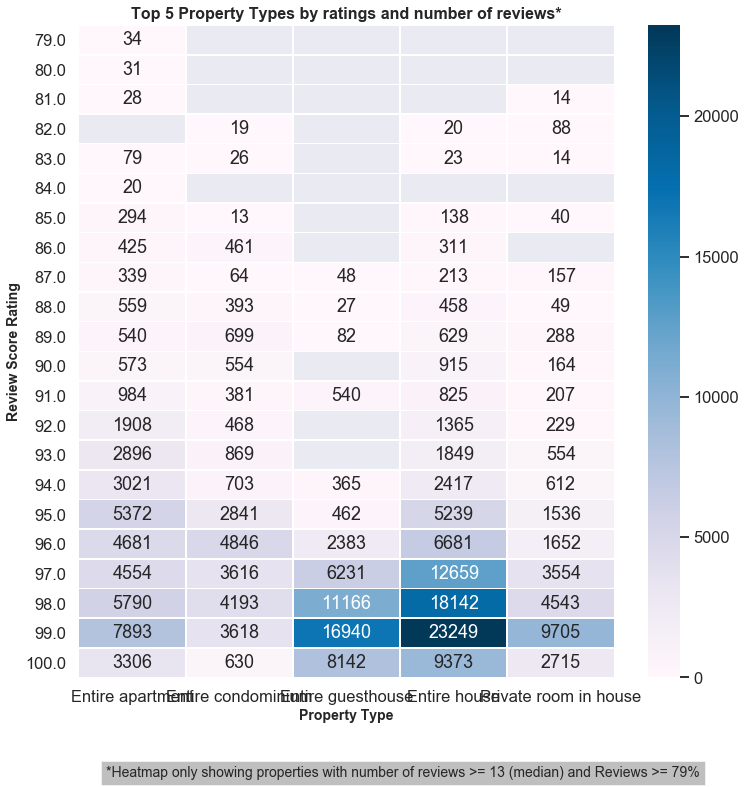

In [38]:
#Create a heatmap using property type, number of reviews, and rating
# Create copy of df_atx_listing
df_copy = df_atx_listing.copy()

#filter data to use only values >= the median of 13, and ratings 79% and above
df_copy = df_copy[(df_copy.number_of_reviews >= 13) & (df_copy.review_scores_rating > .8) ]

#Drop any rows with missing values
df_copy['number_of_reviews']  =  df_copy['number_of_reviews'].dropna()
df_copy['review_scores_rating']  =  df_copy['review_scores_rating'].dropna()

# remove SettingWithCopyWarning 
pd.options.mode.chained_assignment = None  

neighborhood_price = df_copy.groupby(df_copy['property_type'])['number_of_reviews'].sum()
neighborhood_price_indx = neighborhood_price.sort_values(ascending=False)[:5].index
neighborhood_price_pivot = pd.pivot_table(data = df_copy[df_copy['property_type'].isin(neighborhood_price_indx)],
                                      index=['review_scores_rating'],
                                      columns=['property_type'],
                                      values=['number_of_reviews'],
                                      aggfunc='sum')

fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(neighborhood_price_pivot['number_of_reviews'],
            vmin=0,
            annot=True,
            fmt = 'g',
            linewidth=.5,
            ax=ax,
            cmap='PuBu')
sns.set(font_scale = 1)

plt.title('Top 5 Property Types by ratings and number of reviews*', 
          fontsize = 16,
          fontweight='bold')
plt.xlabel('Property Type',
          fontsize = 14,
          fontweight='bold')
plt.ylabel('Review Score Rating',
          fontsize = 14,
          fontweight='bold');
plt.xticks(rotation = 0)
plt.figtext(0.5, 
            0.01, 
            "*Heatmap only showing properties with number of reviews >= 13 (median) and Reviews >= 79%", 
            ha="center", 
            fontsize=14, 
            bbox={"facecolor":"gray", "alpha":0.5, "pad":5});

### Question 2: Answer
Looking at scores between 90 and 100, entire house was rated the highes and had the most reviews, followed by:
- Entire guesthouse
- Entire apartment
- Private room in house
- Entire condominium

### Question 3: What is the average review score rating by neighbourhood?

In [39]:
#Average review score rating by neighbourhood
df_atx_listing.groupby(['neighbourhood']).mean()['review_scores_rating'].sort_values(ascending = False)

neighbourhood
Clarksville, Texas, United States               100.000000
Rollingwood, Texas, United States               100.000000
Dripping Springs, Texas, United States           99.500000
Bee Cave, Texas, United States                   99.333333
Del Valle, Texas, United States                  99.000000
Lago Vista, Texas, United States                 98.500000
Lake Travis, Texas, United States                97.000000
Austin, Texas, United States                     96.581323
Lakeway, Texas, United States                    96.200000
Westlake Hills, Austin, Texas, United States     96.000000
West Lake Hills, Texas, United States            95.454545
Manchaca, Texas, United States                   94.000000
United States                                    94.000000
Sunset Valley, Texas, United States              91.500000
Pflugerville, Texas, United States               90.500000
The Hills, Texas, United States                  90.000000
Round Rock, Texas, United States          

### Question 3: Answer
The top five neighbourhoods with the highest review score rating were Clarksville and Rollingwood at 100%, followed by:
- Dripping Springs (99.5%)
- Bee Cave (99.3%)
- Del Valle (99.0%)

## 4) Modeling

What are the factors that influence price and how relivant are they?

In [40]:
df_atx_listing.head()

,id,scrape_id,name,host_id,host_since,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count_shared_rooms,reviews_per_month,zipcode,price_new
0,2265,20201019155524,Zen-East in the Heart of Austin (monthly rental),2466,2008-08-23,"Austin, Texas, United States",f,East Downtown,3.0,3.0,t,t,NaN,78702,NaN,30.27750,-97.71398,Entire house,Entire home/apt,4,NaN,2 baths,2,2.0,$179.00,7,180,7,7,180,180,7.0,180.0,NaN,t,24,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,NaN,f,0,0.17,78702,179.0
1,5245,20201019155524,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,2008-08-23,"Austin, Texas, United States",f,East Downtown,3.0,3.0,t,t,NaN,78702,NaN,30.27577,-97.71379,Private room in house,Private room,2,NaN,1 private bath,1,2.0,$114.00,30,60,30,30,60,60,30.0,60.0,NaN,t,9,2009-03-19,2018-03-14,91.0,10.0,8.0,10.0,9.0,10.0,9.0,NaN,f,0,0.06,78702,114.0
2,5456,20201019155524,"Walk to 6th, Rainey St and Convention Ctr",8028,2009-02-16,"Austin, Texas, United States",t,East Downtown,1.0,1.0,t,t,"Austin, Texas, United States",78702,NaN,30.26112,-97.73448,Entire guesthouse,Entire home/apt,3,NaN,1 bath,1,2.0,$95.00,2,90,2,2,90,90,2.0,90.0,NaN,t,536,2009-03-08,2020-10-11,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,0,3.79,78702,95.0
3,5636,20201019155524,"Soco, Barton Springs Private Guest Cottage",7148,2009-01-27,"Austin, Texas, United States",f,Bouldin Creek,1.0,1.0,t,f,"Austin, Texas, United States",78704,NaN,30.24630,-97.76361,Entire apartment,Entire home/apt,2,NaN,1 bath,1,1.0,$46.00,30,90,30,30,90,90,30.0,90.0,NaN,t,20,2009-04-20,2012-05-24,95.0,9.0,10.0,10.0,10.0,10.0,9.0,NaN,t,0,0.14,78704,46.0
4,5769,20201019155524,NW Austin Room,8186,2009-02-19,"Austin, Texas, United States",t,SW Williamson Co.,1.0,1.0,t,t,"Austin, Texas, United States",78729,NaN,30.45697,-97.78422,Private room in house,Private room,2,NaN,1 shared bath,1,1.0,$39.00,1,14,1,1,14,14,1.0,14.0,NaN,t,257,2010-04-10,2019-11-03,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,0,2.00,78729,39.0


### Seperate columns in to Quantitative and Categorical

In [41]:
df_atx_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count_shared_rooms,reviews_per_month,zipcode,price_new
count,1.030500e+04,1.030500e+04,1.030500e+04,10302.000000,10302.000000,10305.000000,0.0,10305.000000,10305.000000,10305.000000,0.0,10305.000000,10253.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,0.0,10305.000000,7505.000000,7444.000000,7444.000000,7443.000000,7443.000000,7438.000000,7439.000000,0.0,10305.000000,7619.000000,10305.000000,10305.000000
mean,2.509873e+07,2.020102e+13,9.194110e+07,69.637546,69.637546,78722.906259,NaN,30.282216,-97.752554,4.589811,NaN,1.786997,2.440652,8.661426,606.312082,7.975546,9.000097,740.500243,755.024066,8.413265,747.492926,NaN,30.841145,96.127915,9.762493,9.602499,9.852882,9.843074,9.791880,9.596048,NaN,0.398641,1.323224,78722.906259,269.345120
std,1.442765e+07,3.308754e+00,1.080553e+08,241.529234,241.529234,20.801187,NaN,0.061437,0.057906,3.041782,NaN,1.274886,2.618386,24.200443,517.458257,22.604879,24.600786,499.721122,493.543700,23.366535,495.795191,NaN,66.108801,7.252795,0.718285,0.841838,0.614252,0.644026,0.618811,0.806761,NaN,4.328360,1.713127,20.801187,591.437878
min,2.265000e+03,2.020102e+13,2.300000e+01,0.000000,0.000000,78701.000000,NaN,30.078870,-98.056630,0.000000,NaN,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,0.000000,0.010000,78701.000000,0.000000
25%,1.238537e+07,2.020102e+13,1.059533e+07,1.000000,1.000000,78704.000000,NaN,30.245390,-97.770430,2.000000,NaN,1.000000,1.000000,1.000000,30.000000,1.000000,2.000000,60.000000,100.000000,1.100000,90.000000,NaN,0.000000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,NaN,0.000000,0.160000,78704.000000,81.390000
50%,2.399578e+07,2.020102e+13,4.312843e+07,1.000000,1.000000,78721.000000,NaN,30.269560,-97.744600,4.000000,NaN,1.000000,2.000000,2.000000,365.000000,2.000000,2.000000,1125.000000,1125.000000,2.000000,1125.000000,NaN,5.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,0.000000,0.670000,78721.000000,133.000000
75%,3.892576e+07,2.020102e+13,1.380076e+08,4.000000,4.000000,78744.000000,NaN,30.305370,-97.720270,6.000000,NaN,2.000000,3.000000,3.000000,1125.000000,3.000000,4.000000,1125.000000,1125.000000,3.000000,1125.000000,NaN,29.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,0.000000,1.880000,78744.000000,260.000000
max,4.594346e+07,2.020102e+13,3.717185e+08,2143.000000,2143.000000,78759.000000,NaN,30.515280,-97.560620,16.000000,NaN,23.000000,132.000000,999.000000,1825.000000,999.000000,999.000000,1825.000000,1825.000000,999.000000,1825.000000,NaN,951.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,49.000000,23.860000,78759.000000,10754.000000


In [42]:
df_atx_listing.shape

(10305, 51)

In [43]:
X = df_atx_listing[['review_scores_rating',
                    'review_scores_accuracy',
                    'review_scores_cleanliness',
                    'review_scores_checkin',
                    'review_scores_communication',
                    'review_scores_location',
                    'review_scores_value',
                    'minimum_nights',
                    'maximum_nights',
                    'number_of_reviews',
                    'price']]
y = df_atx_listing['price_new']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.3, random_state = 42)

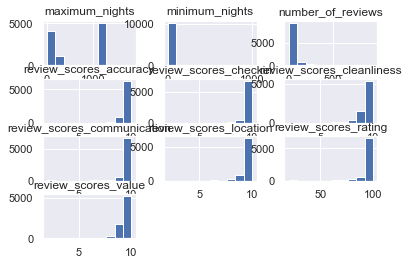

In [44]:
X.hist();

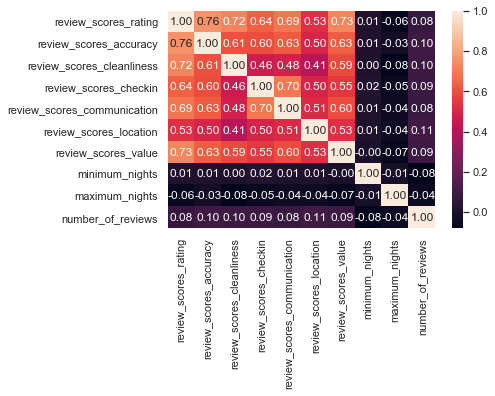

In [45]:
sns.heatmap(X.corr(), annot=True, fmt=".2f");

The dark squares in the heatmap are closer to zero sugessting that there is not a high corr between some of the 

In [46]:
X_test.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,minimum_nights,maximum_nights,number_of_reviews,price
4525,20.0,2.0,6.0,2.0,6.0,6.0,6.0,1,5,1,$85.00
5518,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1125,18,$95.00
4706,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2,1125,228,$73.00
9380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,90,0,$40.00
3307,100.0,10.0,10.0,10.0,10.0,8.0,10.0,2,1125,1,$355.00


In [47]:
y_test[:5]

4525     85.0
5518     95.0
4706     73.0
9380     40.0
3307    355.0
Name: price_new, dtype: float64

In [48]:
df = df_atx_listing.dropna(subset=['price_new'], axis=0)

### Use regression method to find the relevant indicators for price
1. Create functions to clean the variables and create the X matrix
2. Look at numerical and categorical variables that have 60%

In [49]:
#Create dataframe to use for modeling
df = df_atx_listing[['review_scores_rating',
                    'review_scores_accuracy',
                    'review_scores_cleanliness',
                    'review_scores_checkin',
                    'review_scores_communication',
                    'review_scores_location',
                    'review_scores_value',
                    'minimum_nights',
                    'maximum_nights',
                    'number_of_reviews',
                    #'price',
                    'price_new']]
df.dtypes

review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
minimum_nights                   int64
maximum_nights                   int64
number_of_reviews                int64
price_new                      float64
dtype: object

In [50]:
#Create a function to create X (explanatory matrix) and y (response vector) for model
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing price values
    df = df_atx_listing.dropna(subset=['price_new'], axis=0)
    y = df['price_new']
    
    frac = len(df) * 0.6
    df.dropna(thresh=frac, axis=1)
    
    #Drop respondent and expected salary columns
    df = df.drop(['id', 'price_new',], axis=1)
    
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)       

In [51]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    
    for cutoff in cutoffs:
        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
    num_feats.append(reduce_X.shape[1])
    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)
    #fit the model and obtain pred response
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)
    #append the r2 value from the test set
    r2_scores_test.append(r2_score(y_test, y_test_preds))
    r2_scores_train.append(r2_score(y_train, y_train_preds))
    results[str(cutoff)] = r2_score(y_test, y_test_preds)
    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()
    best_cutoff = max(results, key=results.get)
    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])
    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)
    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)
    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

In [52]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 2500, 1000, 500,100, 50, 30, 25]
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

TypeError: invalid type promotion

## 5) Evaluation

## 6) Deployment